In [1]:
from sirf.Gadgetron import AcquisitionData, CoilSensitivityData, AcquisitionModel, ImageData
import numpy as np
import sys
sys.path.append("/home/jovyan/P1-Temp-Reg/modelbased-approach/")
import auxiliary_functions as aux
from scipy.sparse.linalg import bicgstab
from scipy.sparse.linalg import LinearOperator

In [2]:
filepath_y = "/home/jovyan/P1-Temp-Reg/y_4.h5"
y = AcquisitionData(filepath_y)
csm = CoilSensitivityData()
csm.calculate(y)
u = ImageData()
u.from_acquisition_data(y)
A= AcquisitionModel(acqs=y, imgs=u)
A.set_coil_sensitivity_maps(csm)

Started reading acquisitions from /home/jovyan/P1-Temp-Reg/y_4.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..99%..
Finished reading acquisitions from /home/jovyan/P1-Temp-Reg/y_4.h5


In [3]:
beta_1 = 0.1
beta_2 = 0.1

In [4]:
a = np.random.rand(12,128,128)

In [5]:
np.shape(a)

(12, 128, 128)

In [52]:
class LHS():
    def __init__(self, template,beta_x, beta_t,A,Dx,Dt):
        self.template=template
        self.beta_x = beta_x
        self.beta_t = beta_t
        self.A = A
        self.Dx = Dx
        self.Dt = Dt
    
    def forward(self,u):
        b = self.template.copy().fill(np.reshape(u,self.template.shape))
        return self.Left_hand_side(b)
        
    def Left_hand_side(self, u):

        first_part = self.A.backward(self.A.forward(u))
        second_part = self.beta_t*self.Dt.backward(self.Dt.backward(u))
        third_part = self.beta_x * self.Dx.backward(self.Dx.forward(u))
        return (first_part + second_part + third_part).as_array().flatten()



In [53]:
def asdf(u, beta_x, beta_t,A,Dx,Dt):
    u=ImageData(u)
    
    first_part = A.backward(A.forward(u))
    second_part = beta_t*Dt.backward(Dt.backward(u))
    third_part = beta_x * Dx.backward(Dx.forward(u))
    return first_part + second_part + third_part
    
def Right_hand_side(y,mu_x, mu_t, z_x, z_t, beta_x,beta_t, A,Dx,Dt):
    return (A.backward(y) - Dx.backward(mu_x)- Dt.backward(mu_t)
            + beta_t*Dt.backward(z_t) + beta_x*Dx.backward(z_x))

#LHS = lambda u : Left_hand_side(u, beta_x, beta_t,A)
        

In [54]:
def compute_init_u(y,A):
    return A.backward(y)

In [55]:
def solve_u_step(u_k,zt_k,zx_k,beta_x,beta_t,mut_k,mux_k, y,A,Dx,Dt):
    lhs = LHS(u_k,beta_x, beta_t,A,Dx,Dt)
    operator_shape= (u_k.as_array().size, u_k.as_array().size)
    RHS = Right_hand_side(y,mux_k, mut_k, zx_k, zt_k,beta_x,beta_t, A,Dx,Dt)
    Operator = LinearOperator( operator_shape, matvec=lhs.forward )
    #LHS = lambda u : Left_hand_side(u, beta_x, beta_t,A,Dx,Dt)
    
    
    u_next = bicgstab(Operator, RHS.as_array().flatten(), u_k.as_array().flatten())
    return u_next
    

In [56]:
u_k = compute_init_u(y,A)
print(type(u_k))

<class 'sirf.Gadgetron.ImageData'>


In [57]:
#B = LinearOperator((2,2), matvec=LHS)
u_k = compute_init_u(y,A)
Dx = aux.Dx()
Dt = aux.Dt()
zt_k = Dt.forward(u_k)
zx_k = Dx.forward(u_k)

zt_k.fill(0)
zx_k[0].fill(0)
zx_k[1].fill(0)

print(zx_k)
mut_k = zt_k.copy()
mut_k.fill(1.0)


mux_k = (zx_k[0].copy().fill(1), zx_k[1].copy().fill(1))

(<sirf.Gadgetron.ImageData object at 0x7fc1ea2bccd0>, <sirf.Gadgetron.ImageData object at 0x7fc1ea1ea3d0>)


In [58]:
result = solve_u_step(u_k,zt_k,zx_k,beta_1,beta_2,mut_k,mux_k, y,A,Dx,Dt)

(196608, 196608)
(196608, 196608) (196608,) (196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(19660

(196608,)


Text(0.5, 1.0, 'end')

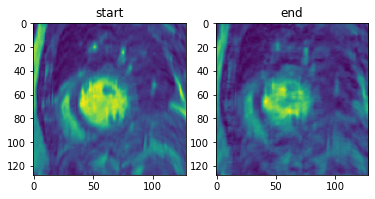

In [70]:
print((result[0].shape))

resimg = np.reshape(result[0], (12,128,128))
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2)
ax[0].imshow(np.abs(np.squeeze(u_k.as_array()[3,:,:])))
ax[0].set_title('start')
ax[1].imshow(np.abs(np.squeeze(resimg[3,:,:])))
ax[1].set_title('end')
